In [88]:
import warnings
warnings.filterwarnings("ignore")

# Librerias

In [1]:
 from astropy.io import fits

In [2]:
%matplotlib inline


In [3]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [4]:
import numpy as np
import pandas as pd
from scipy import interpolate
import io

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from astropy.io import ascii
import os

import json


In [5]:
pd.set_option('display.max_columns',30)

# Montar google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:

os.chdir("/content/drive/MyDrive/Astrofisica/Espectros")
#/content/drive/My Drive/Visualizacion
os.getcwd()

'/content/drive/MyDrive/Astrofisica/Espectros'

# Carga de json con los espectros

In [8]:
directorio = 'BD_espectros_sample/'
nom_fichero = 'datos_obj_espectros.json'
df_obj_espectros_raw = pd.read_json(directorio+nom_fichero)
df_obj_espectros_raw

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6
3,spec-1803-54152-0200.fits,"[-0.5595631599, 1.6141862868999999, -0.4718873...","[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V
4,spec-1955-53442-0499.fits,"[-0.4254819751, 0.28042450550000003, 1.2131350...","[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V
...,...,...,...,...,...,...,...,...,...,...,...
3491,spec-0885-52379-0137.fits,"[0.6488318443000001, 1.1210706234, 0.755453825...","[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",885,52379,137,996459115741997056,-0.000392,good,STAR,M3
3492,spec-0712-52199-0221.fits,"[3.8596711159, 2.1484868526, -2.7742624283, 0....","[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",712,52199,221,801701518582507520,0.000100,good,STAR,M2
3493,spec-0730-52466-0251.fits,"[1.093152523, 1.5214309691999999, 2.8724341393...","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",730,52466,251,821975967722399744,-0.000098,good,STAR,M2
3494,spec-0707-52177-0095.fits,"[-0.6275257468000001, -0.2927546501, -1.621553...","[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",707,52177,95,796037384062920704,-0.000013,good,STAR,M8


In [9]:
df_obj_espectros_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3496 entries, 0 to 3495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  3496 non-null   object 
 1   flujo            3496 non-null   object 
 2   long_A           3496 non-null   object 
 3   PLATE            3496 non-null   int64  
 4   MJD              3496 non-null   int64  
 5   FIBERID          3496 non-null   int64  
 6   SPECOBJID        3496 non-null   int64  
 7   Z                3496 non-null   float64
 8   PLATEQUALITY     3496 non-null   object 
 9   CLASS            3496 non-null   object 
 10  SUBCLASS         3496 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 327.8+ KB


Vemos que no hay nulos.

# Carga información EM en csv

In [10]:
df_info_espectros = pd.read_csv(directorio+'datos_SDSS_objetos.csv', index_col= False, encoding='utf-8')
df_info_espectros

,#plate,mjd,fiberid,run2d,specobj_id,ra,dec,sn_median_r,z,zerr,zwarning,class,subclass
0,275,51910,272,'26','309697273216919552','10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR','M8'
1,275,51910,337,'26','309715140280870912','10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR','M2V'
2,277,51908,496,'26','312010645648205824','11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR','M8'
3,280,51612,316,'26','315338862379427840','11:15:54.18','+00:10:35.44',8.68,-0.000032,0.000030,0,'STAR','M2'
4,281,51614,133,'26','316414459662854144','11:27:53.83','-00:51:39.48',28.26,0.000387,0.000010,0,'STAR','M0V'
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3491,2955,54562,85,'26','3327057665879730176','15:41:38.61','+00:54:17.24',2.15,0.000099,0.000071,0,'STAR','M3'
3492,2955,54562,388,'26','3327140953885534208','15:37:03.16','+01:43:46.66',0.22,0.000085,0.000063,0,'STAR','M8'
3493,2956,54525,58,'26','3328176143462328320','09:56:35.70','+45:36:47.08',1.04,-0.000097,0.000114,0,'STAR','M5'
3494,2959,54537,203,'26','3331593700680689664','07:52:53.40','+30:32:31.78',7.05,0.000276,0.000033,0,'STAR','M0'


In [11]:
df_info_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #plate       3496 non-null   int64  
 1   mjd          3496 non-null   int64  
 2   fiberid      3496 non-null   int64  
 3   run2d        3496 non-null   object 
 4   specobj_id   3496 non-null   object 
 5   ra           3496 non-null   object 
 6   dec          3496 non-null   object 
 7   sn_median_r  3496 non-null   float64
 8   z            3496 non-null   float64
 9   zerr         3496 non-null   float64
 10  zwarning     3496 non-null   int64  
 11  class        3496 non-null   object 
 12  subclass     3496 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 355.2+ KB


Para evitar tener problema con los nombres de las columnas al integrar los vamos a cambiar.

In [12]:
df_info_espectros.columns = list(map(lambda x: x+'2', df_info_espectros.columns))
df_info_espectros.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'specobj_id2', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'],
      dtype='object')

Convertimos specobj_id2 a numerico.

In [13]:
df_info_espectros['specobj_id2'] = df_info_espectros['specobj_id2'].apply(lambda x: pd.to_numeric(x[1:-1]))

In [14]:
df_info_espectros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496 entries, 0 to 3495
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   #plate2       3496 non-null   int64  
 1   mjd2          3496 non-null   int64  
 2   fiberid2      3496 non-null   int64  
 3   run2d2        3496 non-null   object 
 4   specobj_id2   3496 non-null   int64  
 5   ra2           3496 non-null   object 
 6   dec2          3496 non-null   object 
 7   sn_median_r2  3496 non-null   float64
 8   z2            3496 non-null   float64
 9   zerr2         3496 non-null   float64
 10  zwarning2     3496 non-null   int64  
 11  class2        3496 non-null   object 
 12  subclass2     3496 non-null   object 
dtypes: float64(3), int64(5), object(5)
memory usage: 355.2+ KB


# Revisión metadatos

## Definición de funciones

Definiremos una función para obtener los metadatos, otra para los histogramas y otra para representar la distribución de las variables categoricas.

In [343]:
def descripcionDatosDataset(datos,longitud =5): #longitud es el número de valores más repetidos a mostrar
                  
    numericas=[]
    nominales=[]
    print("Cantidad de filas:", datos.shape[0])
    print("Cantidad de columnas:", datos.shape[1])
    print('-'*100)
    print('Columnas: ', datos.columns)
    print('-'*100)
    for columna in datos.columns:
        valoresDescripcion = ''
        tipo = ''
        if datos[columna].dtype == 'float64' or datos[columna].dtype == 'int64':
            tipo = 'numérico'
            valoresDescripcion = datos[columna].agg(['min', 'max', 'mean', 'std', 'median'])#es un diccionario
            cantidadNulos = datos[columna].isna().sum()
            numericas.append(columna)
            
        else:
            tipo = 'nominal' #categórico | string | no-numérico
            lista = [x for x in datos[columna].unique() if str(x) != 'nan'] #quitamos los nulos de la lista de valores únicos
            valoresDescripcion = {'numeroValoresUnicos' : len(lista),
                                  'valoresPresentes' : lista[:10], 
                                  'cantidadNulos' : datos[columna].isna().sum(),
                                  'conteoValores' : pd.value_counts(datos[columna]).sort_values(ascending=False)}
            #si la longitud de lista es menor que el parámetro longitud se mostrarán todos los elementos
            funLongitudMinima = lambda x: len(x) if len(x) < longitud else longitud
            n_datos_a_mostrar = funLongitudMinima(lista)#si nº elementos lista mayor que longitud toma el valor longitud 
            nominales.append(columna)
        print('Columna: ' + columna)
        print('Tipo de datos: ' + tipo)
        print('Descripción de valores:')
        
        if tipo == 'numérico':
            print(valoresDescripcion,'\n')
            pctNulos = cantidadNulos / datos.shape[0] * 100
            print('-- Cantidad de nulos: ' + str(cantidadNulos) + ' = ' + "{0:.2f}".format(pctNulos) + '%')            
        else:
            print('-- Numero valores unicos: ' + str(valoresDescripcion['numeroValoresUnicos'])),
            print('-- Valores presentes (10 primeros): ' + str(valoresDescripcion['valoresPresentes'][:10]))
            pctNulos = (valoresDescripcion['cantidadNulos'] / datos.shape[0]) * 100
            print('-- Cantidad de nulos: ' + str(valoresDescripcion['cantidadNulos']) + ' = ' + "{0:.2f}".format(pctNulos) + '%')
            print('-- Distribucion valores mas repetidos ( '+str(n_datos_a_mostrar)+ ' primeros) :\n', valoresDescripcion['conteoValores'][:n_datos_a_mostrar])
        print('-'*100)
    return numericas, nominales

In [16]:
def plot_numericos(dataset, lista_num, largo = 16, alto = 20): #list_num es la lista con los atributos numéricos
  print(lista_num)
  df_plot = dataset[lista_num]
  IQR = df_plot.quantile(0.75)- df_plot.quantile(0.25)
  df_plot = df_plot[(df_plot>df_plot.quantile(0.25)-5*IQR)&
                      (df_plot<df_plot.quantile(0.75)+5*IQR)] #quitamos valores extremos para mejorar visualización
  plt.style.use('ggplot')
  df_plot.hist(figsize=(largo,alto),bins=30,color='purple',edgecolor='black')

In [344]:
def plot_categoria(dataset, atributo): #atributo es la lista con los atributos no numéricos
  df_plot = dataset[atributo]
  ax = df_plot.value_counts().plot.bar(figsize=(6,8),color='orange',edgecolor='black')
  ax.set_title('Distribución por '+ atributo, size=12)
  ax.set_xlabel(atributo, size=10)
  ax.set_ylabel('Frecuencia', size=10)
  plt.show()


## Metadatos plantillas

FALTA CARGAR LAS PLANTILLAS

## Metadatos espectros

In [18]:
df_obj_espectros_raw.columns

Index(['nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID',
       'SPECOBJID', 'Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS'],
      dtype='object')

In [19]:
n_registros=20 #variable que nos indica el número de valores más repetidos a mostrar
atrib_num, atrib_nom = descripcionDatosDataset(df_obj_espectros_raw[['Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS']],n_registros)

Cantidad de filas: 3496
Cantidad de columnas: 4
----------------------------------------------------------------------------------------------------
Columnas:  Index(['Z', 'PLATEQUALITY', 'CLASS', 'SUBCLASS'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: Z
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: Z, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3
-- Valores presentes (10 primeros): ['good', 'marginal', 'bad']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 good        2348
marginal    1034
bad          114
Name: PLATEQUALITY, dtype: int64
----------------------------

['Z']


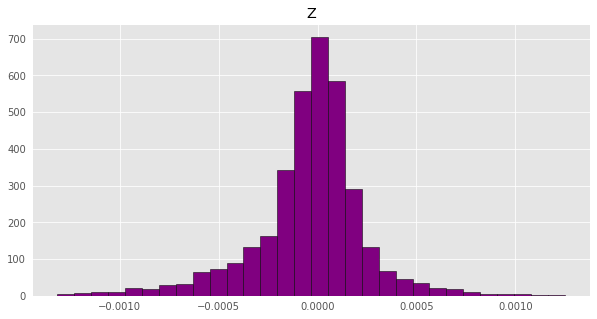

In [20]:
plot_numericos(df_obj_espectros_raw, atrib_num,largo = 10, alto = 5)

atri_nom

In [21]:
atrib_nom


['PLATEQUALITY', 'CLASS', 'SUBCLASS']

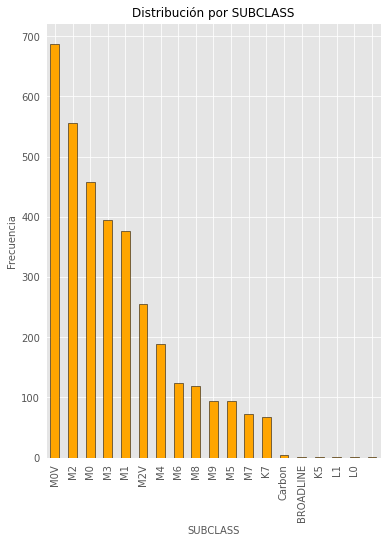

In [22]:
plot_categoria(df_obj_espectros_raw, 'SUBCLASS')

### Revisión de los espectros

Revisamos primero longitudes de onda y los flujos. Dicha información se ha guardado como objeto lista dentro del dataframe.

In [23]:
flujos = df_obj_espectros_raw['flujo']
flujos

0       [0.35031041500000004, -0.1485088319, 0.0116492...
1       [-0.6632891893, 2.39052701, -5.435426712, 1.57...
2       [-0.4185376167, 0.1414910257, -0.6999538541, 0...
3       [-0.5595631599, 1.6141862868999999, -0.4718873...
4       [-0.4254819751, 0.28042450550000003, 1.2131350...
                              ...                        
3491    [0.6488318443000001, 1.1210706234, 0.755453825...
3492    [3.8596711159, 2.1484868526, -2.7742624283, 0....
3493    [1.093152523, 1.5214309691999999, 2.8724341393...
3494    [-0.6275257468000001, -0.2927546501, -1.621553...
3495    [-0.6982907057000001, 1.2785845995, 0.89575284...
Name: flujo, Length: 3496, dtype: object

En principio no haremos nada ya que filtraremos para quitar ruido y normalizaremos

In [24]:
longitudes_onda = df_obj_espectros_raw['long_A']
longitudes_onda

0       [3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....
1       [3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....
2       [3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....
3       [3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....
4       [3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....
                              ...                        
3491    [3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....
3492    [3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....
3493    [3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....
3494    [3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....
3495    [3815.9, 3816.8, 3817.7, 3818.6, 3819.4, 3820....
Name: long_A, Length: 3496, dtype: object

El primer detalle que observamos es que para espectro los flujos corresponden a frecuencias distintas.

Analizamos los las longitudes de onda para cada espectro

In [25]:
n_long_onda = np.asarray([len(x) for x in longitudes_onda])
print(f'numero máximo de longitudes de onda contenidas en un espectro {n_long_onda.max()}, numero mínimo {n_long_onda.min()}')

numero máximo de longitudes de onda contenidas en un espectro 3860, numero mínimo 3094


Vemos que no coinciden el número de muestras de cada espectro.

Analicemos un espectro cualquiera para ver la separación entre las longitudes de onda.

In [26]:
separacion = []
for i in range(0, len(longitudes_onda[0])-1):
  separacion.append(longitudes_onda[0][i+1]-longitudes_onda[0][i])


In [27]:
print(f"maxima separación {max(separacion)}, mínima separación {min(separacion)}")

maxima separación 2.2000000000007276, mínima separación 0.7999999999997272


Tampoco la separación es homogenea.

Respecto a los rangos tenemos:


In [28]:
rangos = np.asarray([np.asarray([min(x), max(x)]) for x in longitudes_onda])
rangos.shape

(3496, 2)

In [29]:
print(f" menor longitud de onda  inferior {rangos[:,0].min()}, mayor longitud de onda inferior {rangos[:,0].max()},\
      menor  superior {rangos[:,1].min()}, mayor  superior {rangos[:,1].max()}")

 menor longitud de onda  inferior 3783.6, mayor longitud de onda inferior 4507.1,      menor  superior 8100.3, mayor  superior 9255.5


Habíamos visto que las plantillas van desde los 5000 Armstrong hasta las 8500. 

Vemos en cuantos espectros no tenemos información para los 8500 A.

In [456]:
df_longitudes_onda=df_obj_espectros_raw[['long_A']]

In [457]:
df_longitudes_onda['max_long_A']=df_longitudes_onda['long_A'].apply(lambda x: max(list(x)))
df_longitudes_onda

,long_A,max_long_A
0,"[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",9210.9
1,"[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",9204.5
2,"[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",9187.6
3,"[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",9185.4
4,"[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",9208.7
...,...,...
3491,"[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",9200.3
3492,"[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",9191.8
3493,"[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",9193.9
3494,"[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",9189.7


Añadimos al dataset la máxima longitud de onda.

In [466]:
index_long_menor_8500 = (df_longitudes_onda['max_long_A']<8500)
df_obj_espectros_raw['max_long_A']= df_longitudes_onda.max_long_A
print(f"numero de espectros sin flujos para longitudes de onda iguales o mayores de 8500  {index_long_menor_8500.sum()}")

numero de espectros sin flujos para longitudes de onda iguales o mayores de 8500  2


In [467]:
df_obj_espectros_raw.head(3)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS,hueco_long_onda,dif_dim_onda_flujos,extrapolado,max_long_A
0,spec-1941-53386-0433.fits,"[0.35031041500000004, -0.1485088319, 0.0116492...","[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2,2.2,0,True,9210.9
1,spec-1808-54176-0058.fits,"[-0.6632891893, 2.39052701, -5.435426712, 1.57...","[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V,2.2,0,False,9204.5
2,spec-1970-53386-0009.fits,"[-0.4185376167, 0.1414910257, -0.6999538541, 0...","[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6,2.2,0,False,9187.6


## Metadatos información EM fichero csv

In [33]:
df_info_espectros.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'specobj_id2', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'],
      dtype='object')

Analizaremos los metadatos de aquella información que nos interesa.

In [34]:
n_registros=20 #variable que nos indica el número de valores más repetidos a mostrar
atrib_num, atrib_nom = descripcionDatosDataset(df_info_espectros[['sn_median_r2', 'z2', 'zerr2', 'zwarning2','class2', 'subclass2']],n_registros)

Cantidad de filas: 3496
Cantidad de columnas: 6
----------------------------------------------------------------------------------------------------
Columnas:  Index(['sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: sn_median_r2
Tipo de datos: numérico
Descripción de valores:
min       -0.230000
max       71.210000
mean       8.011467
std        8.533257
median     5.135000
Name: sn_median_r2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: z2
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: z2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------

['sn_median_r2', 'z2', 'zerr2', 'zwarning2']


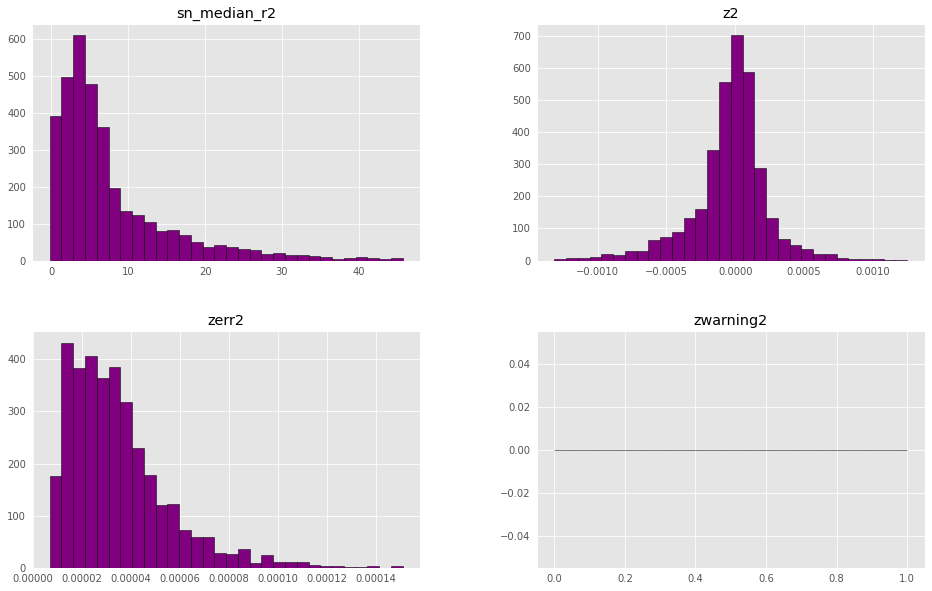

In [35]:
plot_numericos(df_info_espectros, atrib_num,largo = 16, alto = 10)

atri_nom

In [36]:
atrib_nom


['class2', 'subclass2']

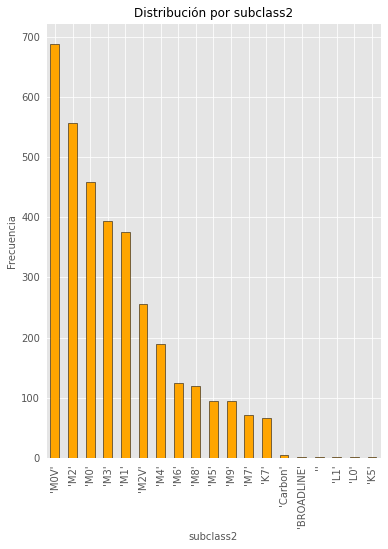

In [37]:
plot_categoria(df_info_espectros, 'subclass2')

# Calidad de los datos

## df_obj_espectros_raw

Vemos que tenemos 

### Z

In [ ]:
'''
Columna: Z
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: Z, dtype: float64 
'''

Valores de Z 0.4 no tiene sentido ya que estamos hablando de estrellas cercanas debiendose el corrimiento al rojo debido a los movimientos propios

### Calidad placas

In [ ]:
'''
Columna: PLATEQUALITY
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3
-- Valores presentes (10 primeros): ['good', 'marginal', 'bad']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 3 primeros) :
 good        2348
marginal    1034
bad          114
Name: PLATEQUALITY, dtype: int64
'''

Vemos hay 114 placas con mala calidad.

### Valores faltantes o nulos en longitudes de onda y flujos.

Analizamos la separación máxima entre longitudes de onda consecutivas en los espectros. En el caso de encontrar valores grandes nos encotraríamos ante una pérdida de datos.

In [86]:
def max_separacion_lo(lista_long):
  """
  Calcula para cada espectro la separación máxima entre las longitudes de onda.
  :param : lista con las longitudes de onda
  :return : separación máxima
  """

  separacion = []
  for i in range(0, len(lista_long)-1):
    separacion.append(lista_long[i+1]-lista_long[i])
  return max(separacion)


In [87]:
max_separacion_lo([2,3,6,10])

4

In [89]:
df_obj_espectros_raw['hueco_long_onda'] = df_obj_espectros_raw['long_A'].apply(max_separacion_lo)

In [90]:
df_obj_espectros_raw['hueco_long_onda'].max()

2.2000000000007276

En principio no hay longitudes de onda faltantes

También comprobamos si el número de datos de los flujos y el de longitudes de onda es el mismo. 

In [124]:
df_obj_espectros_raw['dif_dim_onda_flujos'] = df_obj_espectros_raw[['long_A','flujo']].apply(lambda x: len(x[1])-len(x[0]),axis = 1)


In [125]:
df_obj_espectros_raw['dif_dim_onda_flujos'].max()

0

Tampoco hay en este caso problemas.

Sin embargo hay espectros con datos extrapolados. 

In [349]:
#504506269357336576
objeto = df_obj_espectros_raw[['flujo','long_A']][df_obj_espectros_raw['SPECOBJID']==504506269357336576]
objeto

,flujo,long_A
3152,"[-1.6008164883, -1.7773344517, -1.216822505, 2...","[3818.6, 3819.4, 3820.3, 3821.2, 3822.1, 3823...."


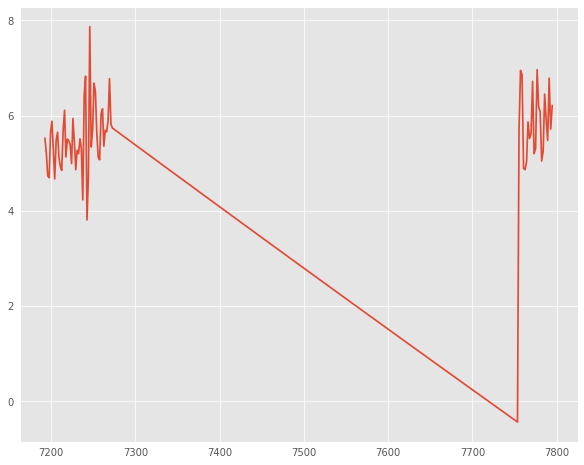

In [278]:

plt.figure(figsize = (10,8))
x = np.asarray(objeto.iloc[0]['long_A'])[2750:3100]
y = np.asarray(objetod.iloc[0]['flujo'])[2750:3100]

plt.plot(x,y)

#### Datos extrapolados

##### test

In [218]:
lista = np.asarray([5,3,1,2,3,4,5,6,7,8,19,20,10,6])
x = np.arange(1,15)+np.random.normal(0,0.1,lista.shape[0])

In [219]:
shift = 2
skip = 1
l2= lista[::skip][shift:]
l1 = lista[::skip][:-shift]
x2 = x[::skip][shift:]
x1= x[::skip][:-shift]

In [220]:
l2

array([ 1,  2,  3,  4,  5,  6,  7,  8, 19, 20, 10,  6])

In [221]:
l1

array([ 5,  3,  1,  2,  3,  4,  5,  6,  7,  8, 19, 20])

In [222]:
m=l2-l1
m

array([ -4,  -1,   2,   2,   2,   2,   2,   2,  12,  12,  -9, -14])

In [223]:
n=x2-x1
n

array([1.81526673, 2.10116302, 2.04604272, 1.86849723, 1.95081396,
       2.01019601, 2.27904832, 2.21832582, 1.9922034 , 1.96244571,
       1.86417997, 1.82543607])

In [232]:
k=np.around(m/n,1)
k

array([-2.2, -0.5,  1. ,  1.1,  1. ,  1. ,  0.9,  0.9,  6. ,  6.1, -4.8,
       -7.7])

In [238]:
k[0]-k[1]

-1.7000000000000002

In [239]:
extrapolado = False
cuenta = 0
comp = 0.
precision = 0.1
for elem in k:
  print(comp,'  ',elem, '   ', cuenta,'  ',extrapolado,'   ',np.abs(elem-comp))
  if np.around(np.abs(elem-comp),1)<=precision:
    cuenta+=1
    if cuenta ==5:
      extrapolado = True
      break
  comp =elem
print(extrapolado)

0.0    -2.2     0    False     2.2
-2.2    -0.5     0    False     1.7000000000000002
-0.5    1.0     0    False     1.5
1.0    1.1     0    False     0.10000000000000009
1.1    1.0     1    False     0.10000000000000009
1.0    1.0     2    False     0.0
1.0    0.9     3    False     0.09999999999999998
0.9    0.9     4    False     0.0
True


##### fin test

In [282]:
def es_extrapolado(espectro, precision, salto, secuencia):
  """
  Muestrea el espectro y calcula  pendiente del espectro entre los puntos
  cuando la pendiente no cambia en número determinado de muestreos devuelve True

  :param : espectro. espectro[0] lista con los flujos, espectro[1] lista con las longitudes de onda
  :param : precision. Rango para considerar que dos pendientes son iguales
  :salto : cada cuantos elementos se muestreara.
  :secuencia: número de veces consecutivas que exigiremos que las pendientes sean iguales para determinar extapolacion.

  :Return: booleano. True si el espectro ha sido extrapolado, False si no

  """
  cuenta = 0
  pendiente=0
  #muestreamos
  flujos= np.asarray(espectro[0])[::salto]
  long =  np.asarray(espectro[1])[::salto]
  #print(flujos)
  #print(long,'\n')
  dif_flujos = flujos[1:] - flujos[:-1]
  dif_long = long[1:] - long[:-1]
  pendientes = dif_flujos/dif_long


  for elem in pendientes:
    if np.abs(elem-pendiente)<=precision:
      cuenta+=1
      if cuenta ==secuencia:
        return True
        break
    else:
      cuenta = 0
    pendiente =elem
  return False



In [309]:
es_extrapolado([y,x],0.001, 5,50)

True

In [359]:
lista_extrapolado = df_obj_espectros_raw[['flujo','long_A']].apply(es_extrapolado,precision=0.0001,salto = 5,\
                                                                secuencia =6,axis=1)

In [360]:
lista_extrapolado.sum()

168

In [361]:
df_obj_espectros_raw['extrapolado']=lista_extrapolado

In [362]:
df_extrapolado = df_obj_espectros_raw[['flujo','long_A']][lista_extrapolado].reset_index(drop=True)
df_extrapolado.shape

(168, 2)

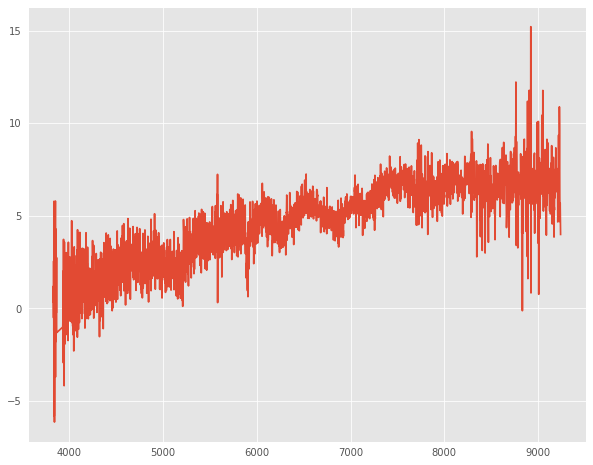

In [365]:
indice =9
plt.figure(figsize = (10,8))
x = np.asarray(df_extrapolado.loc[indice]['long_A'])
y = np.asarray(df_extrapolado.loc[indice]['flujo'])

plt.plot(x,y)

Vemos así como nos cada la distribución por subclase

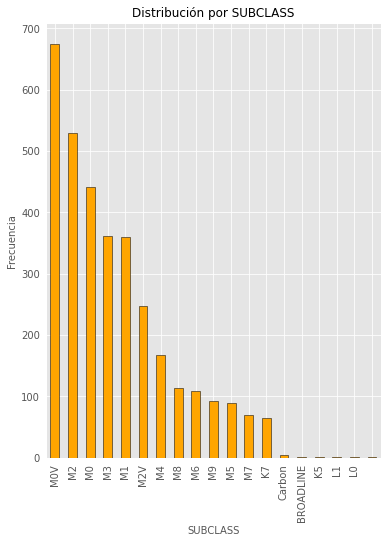

In [367]:
plot_categoria(df_obj_espectros_raw[~lista_extrapolado], 'SUBCLASS')

Vemos que aún tenemos representación de todas las clases

In [192]:
extrapolado

True

In [ ]:
def extrapolados

## df_info_espectros

Teníamos los siguientes metadatos.

In [ ]:
'''
Columna: sn_median_r2
Tipo de datos: numérico
Descripción de valores:
min       -0.230000
max       71.210000
mean       8.011467
std        8.533257
median     5.135000
Name: sn_median_r2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: z2
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.409348
mean      0.000075
std       0.006931
median   -0.000007
Name: z2, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------
Columna: zerr2
Tipo de datos: numérico
Descripción de valores:
min      -1.000000
max       0.000216
mean     -0.000251
std       0.016913
median    0.000030
Name: zerr2, dtype: float64 
'''

In [39]:
(df_info_espectros.sn_median_r2<1).sum()

304

Vemos que hay mucho ruido (Averiguar que quiere decir sn_median_r) mediana signal-noise en la banda r.
También hay datos con bastante incertidumbre en z.

## Claves principales.

### df_obj_espectros_raw

In [40]:
descripcionDatosDataset(df_obj_espectros_raw[['SPECOBJID']].astype('str'))

Cantidad de filas: 3496
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['SPECOBJID'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: SPECOBJID
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3496
-- Valores presentes (10 primeros): ['2185490798122919936', '2035643044551747584', '2218025347188811776', '2030052577277667328', '2201271539700099072', '2218053109857413120', '2218057782781831168', '2193336638254376960', '2193355329952049152', '2187627973849409536']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 5 primeros) :
 1245252492648802304    1
3132305020045780992    1
1400786654741948416    1
3232535124704782336    1
445896250873636864     1
Name: SPECOBJID, dtype: int64
------------------------------------------------------------------------------------------------

([], ['SPECOBJID'])

Vemos que no hay problema de claves principales

### df_info_espectros

In [41]:
descripcionDatosDataset(df_info_espectros[['specobj_id2']].astype('str'))

Cantidad de filas: 3496
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['specobj_id2'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: specobj_id2
Tipo de datos: nominal
Descripción de valores:
-- Numero valores unicos: 3496
-- Valores presentes (10 primeros): ['309697273216919552', '309715140280870912', '312010645648205824', '315338862379427840', '316414459662854144', '316520012779120640', '317605506371840000', '318739932543739904', '368253145786116096', '368296576495413248']
-- Cantidad de nulos: 0 = 0.00%
-- Distribucion valores mas repetidos ( 5 primeros) :
 1245252492648802304    1
669945388005877760     1
1672128537626175488    1
2989397913525839872    1
445896250873636864     1
Name: specobj_id2, dtype: int64
----------------------------------------------------------------------------------------------------

([], ['specobj_id2'])

Vemos aquí tampoco que no hay problema de claves principales

## Claves foraneas.

Como tenemos que integrar los ficheros analicemos si tenemos algún problema con las claves foraneas.

Lo primero es cambiar el nombre a la columna 'specobj_id2' de df_info_espectros ya que es la que usaremos para integrar los datos.

In [368]:
df_info_espectros.rename(columns={'specobj_id2':'SPECOBJID'},inplace = True)
df_info_espectros.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'SPECOBJID', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2'],
      dtype='object')

In [369]:
print(f" filas sin problemas de clave foranea {df_info_espectros.merge(df_obj_espectros_raw, how = 'inner', on = 'SPECOBJID').shape[0]}")

 filas sin problemas de clave foranea 3496


Vemos que no hay ningún problema. 

# Integración de los dataset

In [370]:
df_info_obj_espec = df_info_espectros.merge(df_obj_espectros_raw, how = 'inner', on = 'SPECOBJID')
df_info_obj_espec.head(3)

,#plate2,mjd2,fiberid2,run2d2,SPECOBJID,ra2,dec2,sn_median_r2,z2,zerr2,zwarning2,class2,subclass2,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS,hueco_long_onda,dif_dim_onda_flujos,extrapolado
0,275,51910,272,'26',309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000039,0.000046,0,'STAR','M8',spec-0275-51910-0272.fits,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",275,51910,272,0.000039,good,STAR,M8,2.2,0,False
1,275,51910,337,'26',309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000567,0.000023,0,'STAR','M2V',spec-0275-51910-0337.fits,"[3.3431725502000003, 1.394443512, -1.370499610...","[3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828....",275,51910,337,0.000567,good,STAR,M2V,2.2,0,False
2,277,51908,496,'26',312010645648205824,'11:02:47.93','+00:30:39.59',0.37,-0.000035,0.000028,0,'STAR','M8',spec-0277-51908-0496.fits,"[-3.9273266792, -0.0634190291, -1.0881940126, ...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",277,51908,496,-0.000035,good,STAR,M8,2.2,0,False


# Limpieza de datos.

Lo primero será las columnas que nos nos interesan.

In [45]:
df_info_obj_espec.columns

Index(['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'SPECOBJID', 'ra2', 'dec2',
       'sn_median_r2', 'z2', 'zerr2', 'zwarning2', 'class2', 'subclass2',
       'nom_fichero_fit', 'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID', 'Z',
       'PLATEQUALITY', 'CLASS', 'SUBCLASS'],
      dtype='object')

In [371]:
col_eliminar =['#plate2', 'mjd2', 'fiberid2', 'run2d2', 'z2', 'zwarning2','class2', 'subclass2']
df_info_obj_espec.drop(columns=col_eliminar, inplace = True)

In [372]:
df_info_obj_espec.rename(columns = lambda x: x if x[-1]!='2' else x[:-1], inplace = True)

In [373]:
df_info_obj_espec.columns

Index(['SPECOBJID', 'ra', 'dec', 'sn_median_r', 'zerr', 'nom_fichero_fit',
       'flujo', 'long_A', 'PLATE', 'MJD', 'FIBERID', 'Z', 'PLATEQUALITY',
       'CLASS', 'SUBCLASS', 'hueco_long_onda', 'dif_dim_onda_flujos',
       'extrapolado'],
      dtype='object')

### Z

Para el corrimiento al rojo teníamos para z un máximo de 0.4

Un redshift tan alto como 0.49 no tiene ningún sentido. Comprobamos de que objeto se trata.
(COMPROBAR RANGOS Z)

In [374]:
df_info_obj_espec[['CLASS', 'SUBCLASS']][df_info_obj_espec['Z']>0.01]

,CLASS,SUBCLASS
3139,QSO,BROADLINE


Vemos que un Cuasar. Lo vamos a eliminar.

In [375]:
print(f"número de objetos antes de eliminación {df_info_obj_espec.shape[0]}")
df_info_obj_espec=df_info_obj_espec[df_info_obj_espec['Z']<0.01]
print(f"número de objetos despues de eliminación {df_info_obj_espec.shape[0]}")

número de objetos antes de eliminación 3496
número de objetos despues de eliminación 3495


In [57]:
descripcionDatosDataset(df_info_obj_espec[['Z']],1)

Cantidad de filas: 3495
Cantidad de columnas: 1
----------------------------------------------------------------------------------------------------
Columnas:  Index(['Z'], dtype='object')
----------------------------------------------------------------------------------------------------
Columna: Z
Tipo de datos: numérico
Descripción de valores:
min      -0.004136
max       0.001523
mean     -0.000042
std       0.000304
median   -0.000007
Name: Z, dtype: float64 

-- Cantidad de nulos: 0 = 0.00%
----------------------------------------------------------------------------------------------------


(['Z'], [])

### Calidad placas

Quitaremos aquellos espectros con calidad mala.

In [61]:
mala_calidad = (df_info_obj_espec['PLATEQUALITY']=='bad')
mala_calidad.sum()

114

Los quitamos

In [ ]:
df_info_obj_espec = df_info_obj_espec[~mala_calidad]
df_info_obj_espec.shape[0]

3381

### Datos extrapolados.

Quitaremos también aquellos datos extrapolados

In [376]:
df_info_obj_espec = df_info_obj_espec[ df_info_obj_espec.extrapolado==False]
df_info_obj_espec.shape[0]

3327

# Transformación de los datos

## Corrección de los espectros por el redshift.

Vamos a corregir las longitudes de ondas los espectros por los redshift. Usaremos $\frac{\lambda_o - \lambda_i}{\lambda_i} = Z$, con $\lambda_o$  y  $\lambda_i$  longitudes de onda observada y emitida respectivamente. Luego $\lambda_i = \frac{\lambda_o}{1+ Z}$

Podemos ver de cuánto estamos hablando en el caso de longitudes de onda de 3000 y 9000 Armstrongs para Z mínima y máxima.

In [377]:
df_info_obj_espec['Z'].describe()

count    3327.000000
mean       -0.000042
std         0.000307
min        -0.004136
25%        -0.000150
50%        -0.000007
75%         0.000100
max         0.001523
Name: Z, dtype: float64

In [378]:
lo_inf = 3000
lo_sup = 9000
z_min = -0.004136
z_max =  0.001523
primer_cuartil = -0.000007
tercer_cuartil = 0.000097

print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_inf}: {z_min*lo_inf}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_inf}: {z_max*lo_inf}")
print(f" variación longitud onda para Z = {z_min} y longitud de onda de {lo_sup}: {z_min*lo_sup}")
print(f" variación longitud onda para Z = {z_max} y longitud de onda de {lo_sup}: {z_max*lo_sup}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_inf}: {primer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {primer_cuartil} y longitud de onda de {lo_sup}: {primer_cuartil*lo_sup}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_inf}: {tercer_cuartil*lo_inf}")
print(f" variación longitud onda para Z = {tercer_cuartil} y longitud de onda de {lo_sup}: {tercer_cuartil*lo_sup}")

 variación longitud onda para Z = -0.004136 y longitud de onda de 3000: -12.408
 variación longitud onda para Z = 0.001523 y longitud de onda de 3000: 4.569
 variación longitud onda para Z = -0.004136 y longitud de onda de 9000: -37.224
 variación longitud onda para Z = 0.001523 y longitud de onda de 9000: 13.707
 variación longitud onda para Z = -7e-06 y longitud de onda de 3000: -0.021
 variación longitud onda para Z = -7e-06 y longitud de onda de 9000: -0.063
 variación longitud onda para Z = 9.7e-05 y longitud de onda de 3000: 0.291
 variación longitud onda para Z = 9.7e-05 y longitud de onda de 9000: 0.873


Para los valores entre el primer y el tercer cuartil la variación es inferior a 1 Armstrong. 

Sin embargo conforme nos acercamos a los extremos de la distribución de Z el corrimiento en el espectro puede ser considerable.

En los metadatos vimos que las magnitudes del los errores de Z también eran grandes. Por ello solo corregiremos los espectros que cumplan Z > 2 errZ

In [64]:
#Inspeccionamos la razón Z/zerr
np.abs( df_info_obj_espec['Z']/df_info_obj_espec['zerr'] ).describe()

count    3381.000000
mean        8.583473
std        12.857537
min         0.000645
25%         1.603921
50%         3.565558
75%         9.711021
max       109.379217
dtype: float64

Se define la función para corregir las longitudes de onda.

In [379]:
def correccion_Z(lista, limite):
  """
  Modifica las longitudes de onda en función de z.
  param: lista
    : param[0] lista. lista con las longitudes de onda
    : param[1]. Z.
    : param[2]. error de Z
  : param: limite. Si abs(Z/erroZ) >= limite se corrige la longitud de onda

  : return: lista con las longitudes de onda corregidas
  """
  long = lista[0]
  z = lista[1]
  errorZ = lista[2]
  if np.abs(z/errorZ)>= limite:
    long = list(map(lambda x: np.around(x/(1+z),1),long))
  return long

In [ ]:
correccion_Z([[2,3,5,10],2,1],2)

[0.7, 1.0, 1.7, 3.3]

In [ ]:
df_info_obj_espec.head(1)

,SPECOBJID,ra,dec,sn_median_r,zerr,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000046,spec-0275-51910-0272.fits,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",275,51910,272,0.000039,good,STAR,M8


In [380]:
df_info_obj_espec_zcorr = df_info_obj_espec.copy()
df_info_obj_espec_zcorr['long_A'] = df_info_obj_espec[['long_A','Z','zerr']].apply(correccion_Z, limite =2, axis=1)
df_info_obj_espec_zcorr.head(4)

,SPECOBJID,ra,dec,sn_median_r,zerr,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,Z,PLATEQUALITY,CLASS,SUBCLASS,hueco_long_onda,dif_dim_onda_flujos,extrapolado
0,309697273216919552,'10:42:51.28','+00:04:22.23',0.64,0.000046,spec-0275-51910-0272.fits,"[0.2586207092, 0.6234312057, 0.7740471363, -0....","[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",275,51910,272,0.000039,good,STAR,M8,2.2,0,False
1,309715140280870912,'10:43:20.47','+01:04:39.41',10.18,0.000023,spec-0275-51910-0337.fits,"[3.3431725502000003, 1.394443512, -1.370499610...","[3821.6, 3822.5, 3823.4, 3824.3, 3825.2, 3826....",275,51910,337,0.000567,good,STAR,M2V,2.2,0,False
2,312010645648205824,'11:02:47.93','+00:30:39.59',0.37,0.000028,spec-0277-51908-0496.fits,"[-3.9273266792, -0.0634190291, -1.0881940126, ...","[3806.3, 3807.2, 3808.0, 3808.9, 3809.8, 3810....",277,51908,496,-0.000035,good,STAR,M8,2.2,0,False
3,315338862379427840,'11:15:54.18','+00:10:35.44',8.68,0.000030,spec-0280-51612-0316.fits,"[2.116350174, -3.1608884335, -3.5482480526, 0....","[3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828....",280,51612,316,-0.000032,good,STAR,M2,2.2,0,False


Podemos comprobar las correcciones. 

In [ ]:
indice = 4
print(f" z/error z : {np.abs(df_info_obj_espec.loc[indice]['Z']/df_info_obj_espec.loc[indice]['zerr'])}")
print(f" antes correccion: {df_info_obj_espec.loc[indice]['long_A']}")
print(f"después correccion: {df_info_obj_espec_zcorr.loc[indice]['long_A']}")

 z/error z : 38.678219999999996
 antes correccion: [3819.4, 3820.3, 3821.2, 3822.1, 3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827.4, 3828.2, 3829.1, 3830.0, 3830.9, 3831.8, 3832.7, 3833.5, 3834.4, 3835.3, 3836.2, 3837.1, 3838.0, 3838.8, 3839.7, 3840.6, 3841.5, 3842.4, 3843.3, 3844.1, 3845.0, 3845.9, 3846.8, 3847.7, 3848.6, 3849.5, 3850.3, 3851.2, 3852.1, 3853.0, 3853.9, 3854.8, 3855.7, 3856.6, 3857.4, 3858.3, 3859.2, 3860.1, 3861.0, 3861.9, 3862.8, 3863.7, 3864.6, 3865.4, 3866.3, 3867.2, 3868.1, 3869.0, 3869.9, 3870.8, 3871.7, 3872.6, 3873.5, 3874.4, 3875.3, 3876.1, 3877.0, 3877.9, 3878.8, 3879.7, 3880.6, 3881.5, 3882.4, 3883.3, 3884.2, 3885.1, 3886.0, 3886.9, 3887.8, 3888.7, 3889.6, 3890.5, 3891.3, 3892.2, 3893.1, 3894.0, 3894.9, 3895.8, 3896.7, 3897.6, 3898.5, 3899.4, 3900.3, 3901.2, 3902.1, 3903.0, 3903.9, 3904.8, 3905.7, 3906.6, 3907.5, 3908.4, 3909.3, 3910.2, 3911.1, 3912.0, 3912.9, 3913.8, 3914.7, 3915.6, 3916.5, 3917.4, 3918.3, 3919.2, 3920.1, 3921.0, 3921.9, 3922.8, 3923.7, 3924

### Revisión espectros por subclases

Revisamos espectros pertenecientes a las mismas subclases.

In [70]:
subclases = df_info_obj_espec_zcorr['SUBCLASS'].unique()
subclases

array(['M8', 'M2V', 'M2', 'M0V', 'M0', 'M1', 'L1', 'M3', 'M9', 'M4', 'M7',
       'M5', 'Carbon', 'M6', 'K7', 'L0', 'K5', ''], dtype=object)

Revisamos algunos espectros visualmente para ver las diferencias. Seleccionaremos aquellos que tengan z muy distintos

In [422]:
subclase = 'M9'
Z=0.00015
indices_z_posit = (df_info_obj_espec['SUBCLASS']==subclase) & (df_info_obj_espec['Z']>Z) 
indices_z_negat = (df_info_obj_espec['SUBCLASS']==subclase) & (df_info_obj_espec['Z']<Z) 

espectros_z_posit= df_info_obj_espec[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_z_negat= df_info_obj_espec[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

espectros_corr_z_posit = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_posit].reset_index(drop=True)
espectros_corr_z_negat = df_info_obj_espec_zcorr[['flujo','long_A','Z']][indices_z_negat].reset_index(drop=True)

print(indices_z_posit.sum(),'  ',indices_z_negat.sum())

8    85


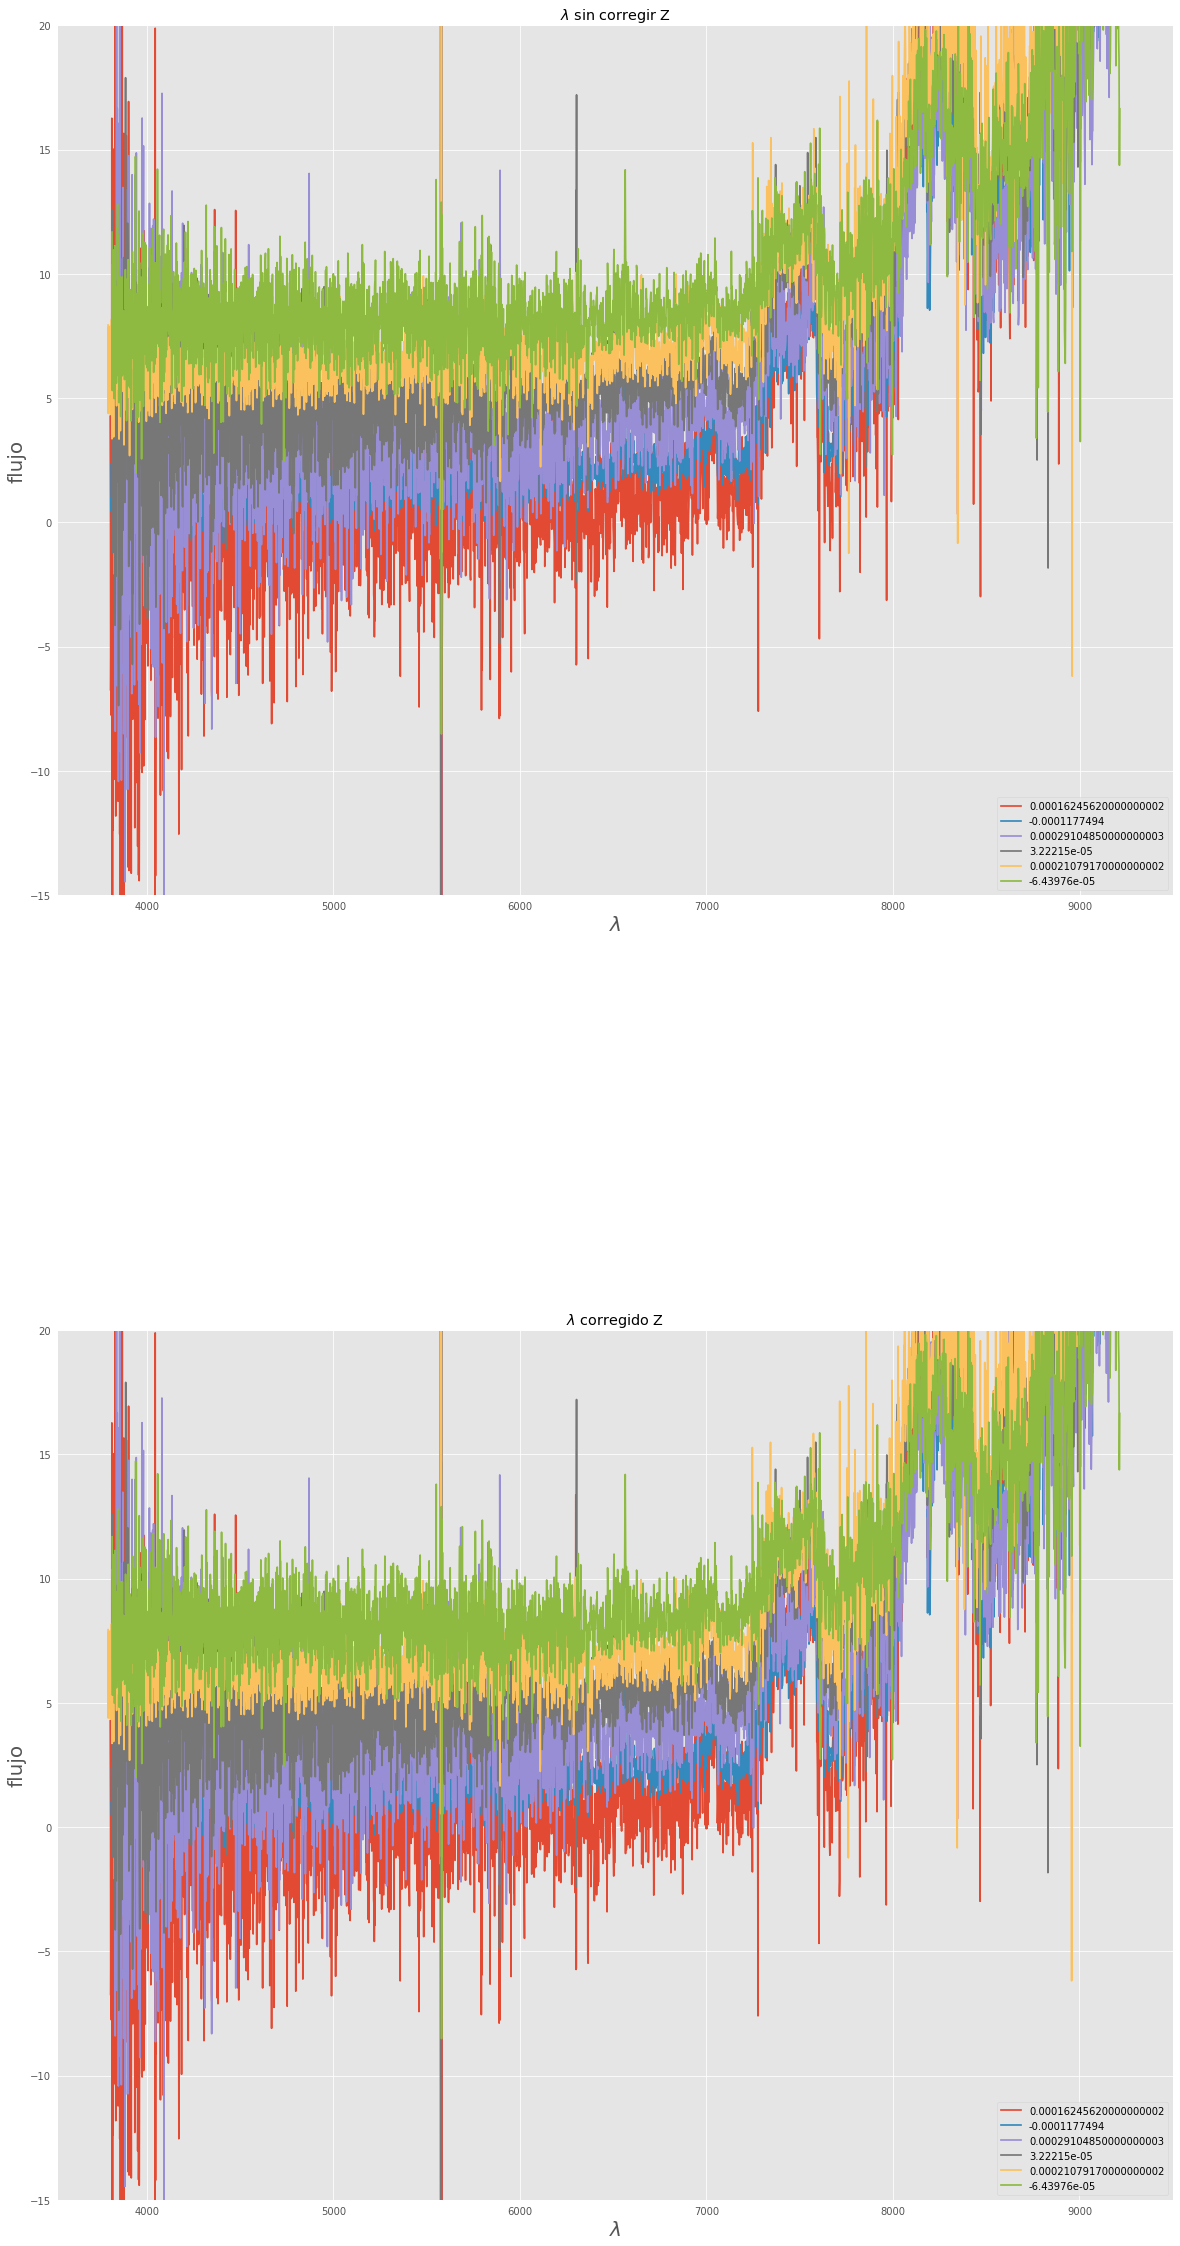

In [430]:
ind = [0,5,7]
desp =3
fig, ax = plt.subplots(2, 1,figsize=(20,40))

for j, i in enumerate(ind):
  x = np.asarray(espectros_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_z_posit.loc[i]['flujo'])/np.asarray(espectros_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j #normalizamos a un intervalo por el ruido
  z = str(espectros_z_posit.loc[i]['Z'])
  ax[0].plot(x,y,label=z)

  x = np.asarray(espectros_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_z_negat.loc[i]['flujo'])/np.asarray(espectros_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.5)
  z = str(espectros_z_negat.loc[i]['Z'])
  ax[0].plot(x,y,label=z)

  x = np.asarray(espectros_corr_z_posit.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_posit.loc[i]['flujo'])/np.asarray(espectros_corr_z_posit.loc[i]['flujo'][2350:2500]).mean())+desp *j
  z = str(espectros_corr_z_posit.loc[i]['Z'])
  ax[1].plot(x,y,label=z)

  x = np.asarray(espectros_corr_z_negat.loc[i]['long_A'])
  y = (np.asarray(espectros_corr_z_negat.loc[i]['flujo'])/np.asarray(espectros_corr_z_negat.loc[i]['flujo'][2350:2500]).mean())+desp *(j+0.5)
  z = str(espectros_corr_z_negat.loc[i]['Z'])
  ax[1].plot(x,y,label=z)


ax[0].set_xlabel('$\lambda$',size=20)
ax[0].set_ylabel('flujo',size = 20)
ax[0].set_title('$\lambda$ sin corregir Z')
ax[0].set_ylim(-15,20)

ax[1].set_xlabel('$\lambda$',size=20)
ax[1].set_ylabel('flujo',size = 20)
ax[1].set_title('$\lambda$ corregido Z')
ax[1].set_ylim(-15,20)
ax[0].legend()
ax[1].legend()

## Ajuste de los flujos a un conjunto de longitudes de onda estándar.

Para poder un análisis posterior interesa que los flujos vengan referidos a una misma base de longitudes de onda.

Descartamos dichos espectros que no tienen información para longitudes de onda iguales o mayores de 8500.

In [461]:
index_long_menor_8500 = (df_longitudes_onda['max_long_A']<8500)
df_obj_espectros = df_info_obj_espec_zcorr[~index_long_menor_8500]
df_obj_espectros.shape[0]

3325

In [462]:
df_longitudes_onda,max_long_A

,long_A,max_long_A
0,"[3798.4, 3799.3, 3800.1, 3801.0, 3801.9, 3802....",9210.9
1,"[3815.0, 3815.9, 3816.8, 3817.7, 3818.6, 3819....",9204.5
2,"[3807.2, 3808.0, 3808.9, 3809.8, 3810.7, 3811....",9187.6
3,"[3808.0, 3808.9, 3809.8, 3810.7, 3811.5, 3812....",9185.4
4,"[3801.0, 3801.9, 3802.8, 3803.6, 3804.5, 3805....",9208.7
...,...,...
3491,"[3803.6, 3804.5, 3805.4, 3806.3, 3807.2, 3808....",9200.3
3492,"[3805.4, 3806.3, 3807.2, 3808.0, 3808.9, 3809....",9191.8
3493,"[3812.4, 3813.3, 3814.2, 3815.0, 3815.9, 3816....",9193.9
3494,"[3823.0, 3823.8, 3824.7, 3825.6, 3826.5, 3827....",9189.7


Definimos un conjunto de longitudes de onda sobre las que interpolaremos los flujos. Tenemos flujos para unas  3800 longitudes de onda en un rango entre los 3800 y 9200 Armstrong. Haremos un sobremuestreo con un paso de 0.5 Armstrong entre 5000 y 8500 haciendo interpolación lineal. 

In [444]:
new_long = np.arange(5000, 8500.5, 0.5)

Podemos inspeccionar gráficamente en algunos espectros la interpolación

In [451]:
indice=80
x = df_obj_espectros.loc[indice]['long_A']
y = df_obj_espectros.loc[indice]['flujo']
f_inter = interpolate.interp1d(x, y)

In [437]:
new_flujo = f_inter(new_long)

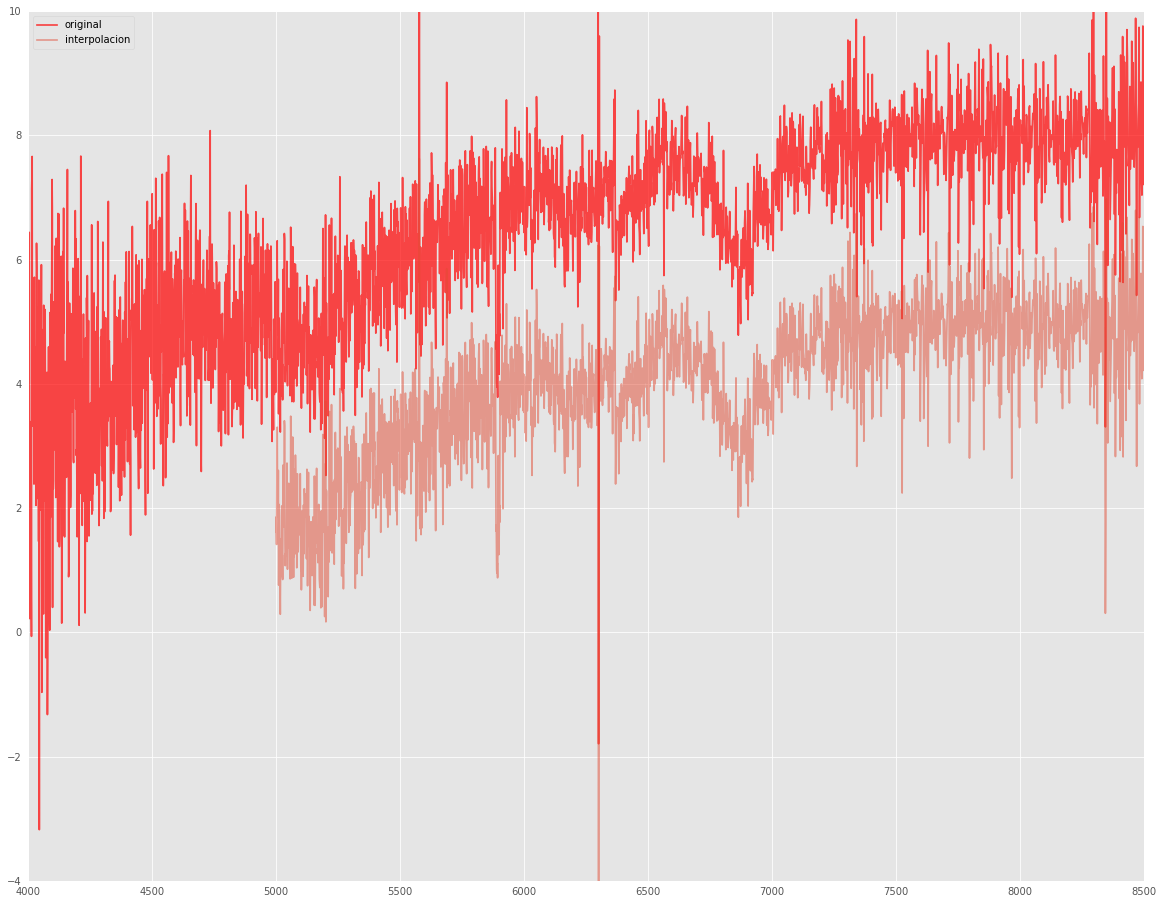

In [439]:
plt.figure(figsize=(20,16))
plt.plot(x, [k+3 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos en 3 el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8500)
plt.ylim(-4,10)
plt.legend()
plt.show()

Hacemos la interpolación para todos los espectros.

In [448]:
def fun_extrapolar(X, new_x):
  new_x = np.arange(5000, 8500.5, 0.5)
  f_inter = interpolate.interp1d(X[0], X[1])
  return  f_inter(new_x)



In [454]:
new_long

array([5000. , 5000.5, 5001. , ..., 8499. , 8499.5, 8500. ])

In [452]:
df_obj_espectros_extrap = df_obj_espectros.copy()

In [460]:
 df_obj_espectros_extrap.flujo = df_obj_espectros_extrap[['long_A','flujo']].apply(fun_extrapolar, new_x = new_long, axis=1)

ValueError: ignored

Podemos comparar los flujos.

In [ ]:
df_obj_espectros.flujo[:5]

0    [0.35031041500000004, -0.1485088319, 0.0116492...
1    [-0.6632891893, 2.39052701, -5.435426712, 1.57...
2    [-0.4185376167, 0.1414910257, -0.6999538541, 0...
3    [-0.5595631599, 1.6141862868999999, -0.4718873...
4    [-0.4254819751, 0.28042450550000003, 1.2131350...
Name: flujo, dtype: object

In [ ]:
df_obj_espectros_extrap.flujo[:5]

0    [0.4583062069089988, 0.9590457975998736, 1.376...
1    [2.374181292290927, 2.247341235516714, 2.09191...
2    [0.26137306477276095, 0.1274133349833424, 0.09...
3    [0.33863551778182943, 0.2462751601333724, 0.11...
4    [0.17825327134559066, -0.21612850331674238, 0....
Name: flujo, dtype: object

Para ahorrar espacio guardaremos las longitudes de onda solo en el primer registro

In [ ]:
df_obj_espectros_extrap.long_A = [new_long]+ [0]*(df_obj_espectros_extrap.shape[0]-1) 

In [ ]:
df_obj_espectros_extrap.head(5)

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.4583062069089988, 0.9590457975998736, 1.376...","[5000.0, 5000.5, 5001.0, 5001.5, 5002.0, 5002....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[2.374181292290927, 2.247341235516714, 2.09191...",0,1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V
2,spec-1970-53386-0009.fits,"[0.26137306477276095, 0.1274133349833424, 0.09...",0,1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6
3,spec-1803-54152-0200.fits,"[0.33863551778182943, 0.2462751601333724, 0.11...",0,1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V
4,spec-1955-53442-0499.fits,"[0.17825327134559066, -0.21612850331674238, 0....",0,1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V


Podemos inspeccionar graficamente los resultados.

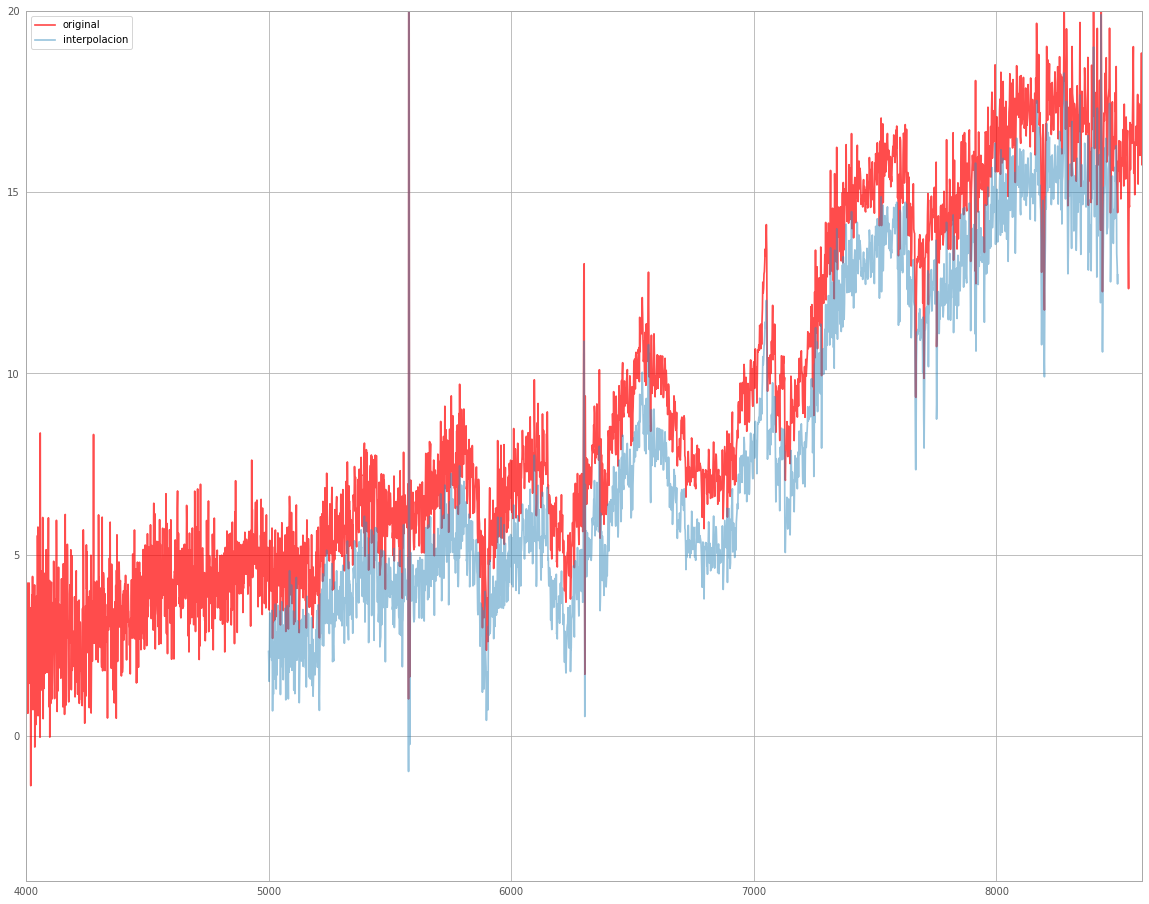

In [ ]:
indice =70

new_flujo = df_obj_espectros_extrap.loc[indice,'flujo']
x = df_obj_espectros.loc[indice]['long_A']
y = df_obj_espectros.loc[indice]['flujo']

plt.figure(figsize=(20,16))
plt.plot(x, [k+2 for k in y], color='r', label = 'original',alpha = 0.7) #desplazamos  el espectro original
plt.plot(new_long, new_flujo, label='interpolacion', alpha = 0.5)
plt.xlim(4000,8600)
plt.ylim(-4,20)
plt.legend()
plt.show()

### Guardado y carga de los espectros extrapolados.

Lo guardamos el dataset en formato json. (No es posible en csv)

In [ ]:
import json


In [ ]:
df_obj_espectros_extrap.to_json(directorio+'datos_obj_espectros_extrapolados.json')

Comprobamos que se lee correctamente.

In [ ]:
df_obj_espectros_extrap_test = pd.read_json(directorio+'datos_obj_espectros_extrapolados.json')


In [ ]:
df_obj_espectros_extrap_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3494 entries, 0 to 3495
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nom_fichero_fit  3494 non-null   object 
 1   flujo            3494 non-null   object 
 2   long_A           3494 non-null   object 
 3   PLATE            3494 non-null   int64  
 4   MJD              3494 non-null   int64  
 5   FIBERID          3494 non-null   int64  
 6   SPECOBJID        3494 non-null   int64  
 7   Z                3494 non-null   float64
 8   PLATEQUALITY     3494 non-null   object 
 9   CLASS            3494 non-null   object 
 10  SUBCLASS         3494 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 327.6+ KB


In [ ]:
df_obj_espectros_extrap_test

,nom_fichero_fit,flujo,long_A,PLATE,MJD,FIBERID,SPECOBJID,Z,PLATEQUALITY,CLASS,SUBCLASS
0,spec-1941-53386-0433.fits,"[0.4583062069, 0.9590457976000001, 1.376006439...","[5000.0, 5000.5, 5001.0, 5001.5, 5002.0, 5002....",1941,53386,433,2185490798122919936,-0.000109,good,STAR,M2
1,spec-1808-54176-0058.fits,"[2.3741812923, 2.2473412355, 2.0919109981, 1.9...",0,1808,54176,58,2035643044551747584,-0.000234,good,STAR,M2V
2,spec-1970-53386-0009.fits,"[0.2613730648, 0.12741333500000002, 0.09754228...",0,1970,53386,9,2218025347188811776,-0.000053,good,STAR,M6
3,spec-1803-54152-0200.fits,"[0.3386355178, 0.2462751601, 0.1175131917, -0....",0,1803,54152,200,2030052577277667328,0.000217,good,STAR,M2V
4,spec-1955-53442-0499.fits,"[0.17825327130000002, -0.2161285033, 0.0335604...",0,1955,53442,499,2201271539700099072,-0.000042,marginal,STAR,M2V
...,...,...,...,...,...,...,...,...,...,...,...
3491,spec-0885-52379-0137.fits,"[0.0470406359, -0.0807885304, 0.1428705417, 0....",0,885,52379,137,996459115741997056,-0.000392,good,STAR,M3
3492,spec-0712-52199-0221.fits,"[2.1869537613, 2.423580726, 3.1176847617, 3.81...",0,712,52199,221,801701518582507520,0.000100,good,STAR,M2
3493,spec-0730-52466-0251.fits,"[-0.2745212439, -0.3973363042, -0.260108307000...",0,730,52466,251,821975967722399744,-0.000098,good,STAR,M2
3494,spec-0707-52177-0095.fits,"[0.13983286920000002, -0.0877174434, -0.357060...",0,707,52177,95,796037384062920704,-0.000013,good,STAR,M8


## Filtrado de los espectros

## Normalización de los espectros.

# Final